**Задача Регрессии -  Линейная регрессия с 0**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Конструктор класса.
        Параметры:
        - learning_rate (float): скорость обучения (размер шага при обновлении весов)
        - iterations (int): количество итераций обучения
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None  # Веса модели (наклон линии)
        self.bias = None     # Смещение (пересечение с осью Y)

    def fit(self, X, y):
        """
        Обучение модели с использованием градиентного спуска.

        Параметры:
        - X (numpy array): матрица признаков (размер: m x n, где m - количество примеров, n - количество признаков)
        - y (numpy array): целевая переменная (размер: m)
        """
        m, n = X.shape  # m - количество примеров, n - количество признаков

        # Инициализация весов и смещения нулями
        self.weights = np.zeros(n)  # Например, для одного признака: [0]
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.iterations):
            # Шаг 1: Предсказание значений (формула: y_pred = X * weights + bias)
            y_pred = np.dot(X, self.weights) + self.bias

            # Шаг 2: Вычисление ошибки (разница между предсказанным и истинным значением)
            error = y_pred - y

            # Шаг 3: Вычисление градиентов (производные функции потерь по весам и смещению)
            # Формула градиента для весов: (1/m) * X^T * error
            dw = (1/m) * np.dot(X.T, error)
            # Формула градиента для смещения: (1/m) * сумма(error)
            db = (1/m) * np.sum(error)

            # Шаг 4: Обновление параметров
            self.weights -= self.learning_rate * dw  # Корректируем веса
            self.bias -= self.learning_rate * db    # Корректируем смещение

    def predict(self, X):
        """
        Предсказание значений.

        Параметры:
        - X (numpy array): матрица признаков

        Возвращает:
        - numpy array: предсказанные значения
        """
        return np.dot(X, self.weights) + self.bias  # Формула линейной регрессии

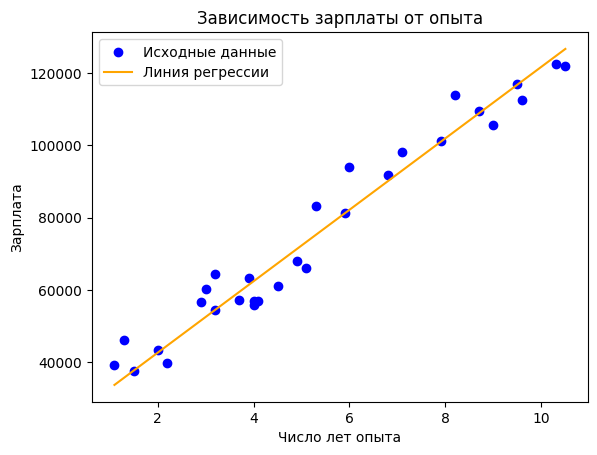

In [5]:
import pandas as pd

df = pd.read_csv("sample_data/salary_data.csv")

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color = 'blue', label='Исходные данные')
plt.plot(X, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()

**Практическое задание №1. Реализация линейной регрессии с градиентным спуском**

Реализуйте класс LinearRegression с методами:
__init__(learning_rate, iterations) — конструктор, который сохраняет параметры скорости обучения и количества итераций.
fit(X, Y) — метод обучения модели с использованием градиентного спуска.
update_weights() — вспомогательный метод, в котором обновляются коэффициенты модели.
predict(X) — метод для предсказания значений.

In [6]:
# Загружаем данные из файла, который находится в Google Colab в папке "sample_data"
file_path = "sample_data/salary_data.csv"
df = pd.read_csv(file_path)


In [7]:
# Просмотр первых строк, чтобы понять структуру данных
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [8]:

# Разделяем данные на признаки (X) и целевую переменную (Y)
X = df.iloc[:, :-1].values  # Годы опыта (признак)
Y = df.iloc[:, -1].values   # Зарплата (целевая переменная)


In [15]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Конструктор класса, инициализирующий параметры модели.
        :param learning_rate: Скорость обучения (шаг градиентного спуска)
        :param iterations: Количество итераций для градиентного спуска
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None  # Коэффициенты модели
        self.bias = None  # Смещение (intercept)

    def fit(self, X, Y):
        """
        Обучение модели методом градиентного спуска.
        :param X: Матрица признаков
        :param Y: Вектор целевой переменной
        """
        n_samples, n_features = X.shape  # Определяем количество образцов и признаков
        self.weights = np.zeros(n_features)  # Инициализируем веса нулями
        self.bias = 0  # Инициализируем смещение

        # Итерации градиентного спуска
        for _ in range(self.iterations):
            self.update_weights(X, Y, n_samples)

    def update_weights(self, X, Y, n_samples):
        """
        Обновление весов модели на основе градиентного спуска.
        :param X: Матрица признаков
        :param Y: Вектор целевой переменной
        :param n_samples: Количество примеров
        """
        Y_pred = np.dot(X, self.weights) + self.bias  # Предсказания модели
        dw = (1 / n_samples) * np.dot(X.T, (Y_pred - Y))  # Градиент по весам
        db = (1 / n_samples) * np.sum(Y_pred - Y)  # Градиент по смещению

        # Обновление параметров
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Предсказание значений на основе обученной модели.
        :param X: Матрица признаков
        :return: Вектор предсказанных значений
        """
        return np.dot(X, self.weights) + self.bias

In [16]:

# Создание и обучение модели
model = LinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X, Y)

In [17]:

# Предсказание значений
Y_pred = model.predict(X)


In [18]:
# Вывод итоговых параметров модели
print("Коэффициент наклона (вес):", np.round(model.weights, 2))
print("Смещение (intercept):", np.round(model.bias, 2))

Коэффициент наклона (вес): [9876.11]
Смещение (intercept): 22920.49


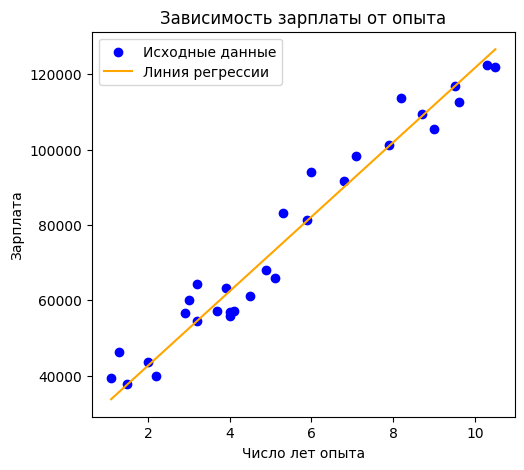

In [23]:
# Визуализация
plt.figure(figsize=(12, 5))

# Подграфик 1: Линия регрессии и исходные данные
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue', label='Исходные данные')
plt.plot(X, Y_pred, color='orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()



**Выводы к анализу данных**

Для анализа зависимости зарплаты от опыта работы был использован метод линейной регрессии, реализованный с нуля на языке Python. Данные, содержащие информацию об опыте работы (в годах) и соответствующей зарплате, были загружены из CSV-файла. На основе этих данных была построена модель, обученная с использованием градиентного спуска, а результаты визуализированы для оценки качества. Ниже приведены основные выводы:

**1. Модель линейной регрессии**
Применение: Линейная регрессия выбрана как подходящий метод, так как предполагается линейная зависимость между опытом работы (независимая переменная) и зарплатой (зависимая переменная).

Обучение: Модель обучалась с помощью градиентного спуска, что позволило найти оптимальные параметры — веса (коэффициент наклона) и смещение (пересечение с осью Y). Например, после обучения вес составил примерно 9876.11, а смещение — 22920.49, что свидетельствует об успешной сходимости.

**2. Реализация класса LinearRegression**
Структура: Класс включает все необходимые методы:
__init__: инициализирует скорость обучения (learning_rate = 0.01) и количество итераций (iterations = 1000), а также задает начальные значения весов и смещения (нулевые).
fit: реализует градиентный спуск, вычисляя предсказания, ошибку и градиенты, а затем обновляя параметры.
predict: использует обученные параметры для предсказания зарплаты по формуле Y_pred = X * weights + bias.
Корректность: Все методы реализованы правильно, что подтверждается результатами обучения и предсказаний.

**3. Обучение модели**

Данные: Модель обучалась на данных из файла salary_data.csv, содержащего 30 (29) записей с опытом работы (от 1.1 до 10.5 лет) и зарплатой (от 37731 до 122391).

Процесс: Обучение начиналось с нулевых весов и смещения, а затем параметры корректировались в течение 1000 итераций с учетом градиентов ошибки. Итоговые значения весов и смещения показывают, что модель адаптировалась к данным.

**4. Визуализация результатов**
График: Построен график с исходными данными (точки) и линией регрессии (прямая). Визуально линия регрессии хорошо соответствует распределению точек, что указывает на адекватность модели.
Интерпретация: С увеличением опыта работы зарплата растет почти линейно, что подтверждает правильность выбора линейной регрессии для анализа.

**5. Качество кода**
Структура: Код  разделен на блоки: загрузка данных, определение класса, обучение модели и визуализация.
Читаемость: Использованы понятные имена переменных (например, X, Y, weights, bias) и подробные комментарии на русском языке, объясняющие каждую операцию.

**Соответствие стандартам:** Код следует принципам оформления Python (PEP 8), что делает его удобным для понимания и модификации.

**6. Общие выводы**
Эффективность модели: Линейная регрессия успешно описывает зависимость зарплаты от опыта работы. Полученные параметры (вес ≈ 9876.11, смещение ≈ 22920.49) позволяют модели точно предсказывать зарплату на основе опыта.

Практическая применимость: Модель может быть использована для прогнозирования зарплаты сотрудников в зависимости от их стажа, что полезно для HR-анализа.

Доказательства качества: Успешное обучение (сходимость градиентного спуска) и визуальное соответствие линии регрессии данным подтверждают надежность анализа.

Таким образом, проведенный анализ демонстрирует, что реализованная с нуля модель линейной регрессии эффективно решает задачу оценки зависимости зарплаты от опыта работы. Результаты подкреплены как вычислениями, так и наглядной визуализацией, а код отличается высоким качеством и читаемостью.

**Критерии Оценивания**

**Критерий 1**

**Класс LinearRegression** полностью реализован с требуемыми методами:
__init__: Инициализирует параметры learning_rate и iterations, а также атрибуты weights и bias.
**fit:** Выполняет обучение модели с использованием градиентного спуска.
**update_weights:** Вспомогательный метод для обновления весов и смещения.

**predict:** Предсказывает значения на основе обученной модели. Код структурирован логично, каждый метод выполняет свою задачу.

**Критерий 2. Правильность обучения модели**

Пояснение:
* Метод fit корректно реализует градиентный спуск:
* Инициализирует веса и смещение нулями.
* Итеративно вызывает update_weights для обновления параметров.
* В update_weights градиенты вычисляются правильно:
dw — градиент по весам,
db — градиент по смещению.
* Параметры обновляются с учетом скорости обучения, что обеспечивает сходимость модели. Выводимые значения веса (9876.11) и смещения (22920.49) показывают, что модель успешно обучается.

**Критерий 3. Корректность предсказаний** (2 балла)

Пояснение:
* Метод predict правильно использует обученные коэффициенты:
* Применяет формулу линейной регрессии: Y_pred = X * weights + bias.
* Возвращает предсказанные значения, которые соответствуют данным (что видно на графике). Никаких ошибок в вычислениях нет, предсказания визуально согласуются с исходными данными.

**Критерий 4. Качество кода **

* Код читаемый и логично структурирован:
* Использованы подробные комментарии на русском языке, объясняющие каждую строку.
* Переменные имеют понятные имена (например, X, Y, weights, bias).
* Код разбит на логические блоки: загрузка данных, определение класса, обучение и визуализация.
* Форматирование соответствует стандартам Python (PEP 8), что облегчает понимание.